In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import seaborn as sns

In [46]:
data = pd.read_excel("Data/train.xlsx")

In [47]:
data = data[np.isnan(data["well id"]) != True]
data = data[np.isnan(data["goal"]) != True]

In [50]:
data = data.fillna(-1)
delta = 200

In [66]:
df = data[(data["depth, m"] > min_depth) & (data["depth, m"] < min_depth + delta)]
    
target = df["goal"]
train = df.drop("goal", axis = 1)
train = train.drop("lith", axis = 1)
train = train.drop("well id", axis = 1)

In [74]:
features = list()

for min_depth in range(1000, int(max(data["depth, m"])), 100):
    df = data[(data["depth, m"] > min_depth) & (data["depth, m"] < min_depth + delta)]
    
    target = df["goal"]
    train = df.drop("goal", axis = 1)
    train = train.drop("lith", axis = 1)
    train = train.drop("well id", axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.33)

    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn.ensemble import GradientBoostingClassifier
    clf = GradientBoostingClassifier(n_estimators=200)
    clf = clf.fit(X_train, y_train)

    data_outputs = clf.predict(X_test)

    importances = clf.feature_importances_
    
    features.append(importances[1:])
    

    print(f1_score(y_test, data_outputs))
    
features = np.array(features)

0.9224237746043998
0.8729001584786054
0.8132260947274352
0.8238805970149253
0.8538283062645011
0.8446969696969697
0.8163487738419619
0.8507936507936508
0.8153846153846154
0.7987841945288755
0.7064559019057468
0.7091831452531319
0.7275854654912922
0.714662340296086
0.6997020854021848
0.6858934169278996
0.6977518734388011
0.6805302833376657
0.6407112201103619
0.6442244224422441
0.8220858895705522
0.7741935483870968


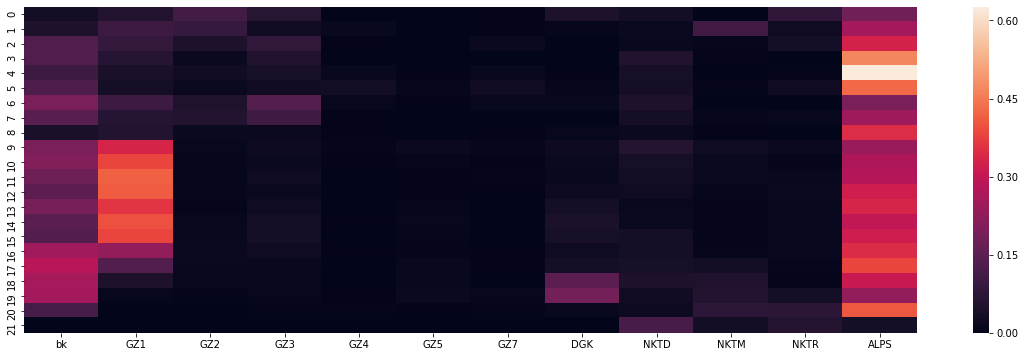

In [76]:
plt.figure(figsize = (20, 6))
sns.heatmap(features, xticklabels = df.columns[2:-2])

In [55]:
usable = train.columns[indices[-7:]]

In [32]:
usable

Index(['GZ2', 'NKTD', 'NKTR', 'NKTM', 'GZ5', 'GZ7', 'GZ4'], dtype='object')

In [35]:
for par in usable:
    data = data.drop(par, axis = 1)

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.00)
